** bold textthe Board**

In [ ]:
import math
import sys 
import random
import array
import pygame
import copy
import matplotlib.pyplot as plt


In [ ]:
class Board : 
    def __init__(self):
        yellow_coin = '*'
        red_couin   = '#'
        #the initialization for the board 
        self.board = [['0' for j in range(7)] for i in range(6)]


    def editing (self , row , column , coin_symbol ) :
        self.board[row][column] = coin_symbol
      
    def undo(self , row , column ) :
      self.board[row][column] = '0'
    
    def return_value(self , row , column ) : 
      return self.board[row][column]
    
    def return_board(self):
      return self.board

    def print(self): 
      row = 6 
      for row in (self.board) :
          print(''.join(row))



**class game play**

In [ ]:
#object of board                                                                          done 
#player1_coin                                                                             done 
#player2_coin                                                                             done 
#object from 2 agents                                                                     done 
#object from pc agent                                                                     done 
#list of the next possible cells                                                          done 

#function to choose one from the 3 options : 
          # 1- minimax             vs apla-beta pruniing 
          # 2- minimax             vs pc 
          # 3- alpha-beta prunning vs pc 
          # 4- user                vs ( tossing between the algorithms)



# function that control the looping of the game :                                         done 
        # this function have while loop that end if one the 2 users is win
        # this function has  pring the user ------- is winning 


#function to update the list of the next possible cells                                   done

#function to check winning 
      # this function call subfunctions : 
            # 1- check row      ( right , left  ) 
            # 2- check column   ( right , left  )
            # 3- check digonal  (rigt   ,   lef )



In [ ]:
#class that hold the check winning and the upadate the next possible cells 
class fun_needed : 
  def __init__(self): 
    self.The_board=Board()
    self.ncp = []
  
#------------------------------------------------------------------------------- The checking functions --------------------------------------------------#
  def rows (self  , symbol , row , column):
      counter = 0
      max = 0 

      ch_column = column 

      for i in range (0 , 7 ) : 
        if(self.The_board.return_value(row , i) == symbol ):
            counter +=1 
        
        else : 
            if(max < counter ) :
                max = counter 

            counter = 0 
      if(max <counter ) : 
          max = counter 
      if(max == 4 ) :
        return True
      else :
        return False 
      
    #------------------------------------------------------------------------ columsn -------------------------------------------------------#
  def columns (self , symbol , row , column ) : 
      counter = 0 
      max = 0 
      for i in range ( 0 , 6 ) : 
        if(self.The_board.return_value(i , column ) == symbol ) : 
            counter += 1 
        else :
          if(max < counter ) :
            max = counter 

          counter = 0 
      if(max <counter ) : 
          max = counter 
      if(max == 4 ) : 
        return True
      else : 
        return False 



    #------------------------------------------------------------------------ the diagonals -------------------------------------------------------#
   
  def diagonal(self, symbol , row , column ) : 
    rs = 0 
    cs=0 
    counter = 0 
    max  = 0 
     
    if(row >= column):
        cs = 0 
        rs = row - column  
    elif(column >row):
        rs = 0 
        cs = column - row 
              
    
    while(rs <= 5 and cs <= 6 ) :
            if(self.The_board.return_value(rs  , cs ) == symbol ) :
              counter +=1 
            else :
              if(counter > max ):
                max = counter
              
              counter = 0 

            rs += 1 
            cs+=1 

    if(max <counter ) : 
        max = counter          
    if(max == 4 ) :
      return True 
    else : 
      counter = 0 
      max  = 0
      if(row +column <= 6 ) : 
        rs = 0 
        cs  = row +column
      elif(row + column > 6 ) : 
        cs = 0 
        rs = (column + row ) - 6 
      

      while(rs <= 5 and cs >= 0):
        if(self.The_board.return_value(rs  , cs ) == symbol):
          counter +=1 
        else: 
          if(counter > max ): 
            max = counter 
          counter = 0 
        
        rs+=1
        cs-=1
        
      if(max <counter ) : 
          max = counter 
      if(counter == 4 ):
        return True 
      else : 
        return False


  def check_winning(self  , board , playertype, column  , thelist):
      self.npc = thelist
      self.The_board = board 
      if(playertype == 1 ) : 
        if(self.rows('*' ,  self.npc[column], column ) == True  or  self.columns('*' ,  self.npc[column], column ) == True  or self.diagonal('*' ,  self.npc[column], column ) == True):
          return True 
        else:
          return False 
      else :
        if(self.rows('#' ,  self.npc[column], column ) == True  or  self.columns('#' ,  self.npc[column], column ) == True  or self.diagonal('#' ,  self.npc[column], column ) == True):
          return True 
        else : 
          return False 


  def update_the_npc (self  , index  , listing ):
      self.ncp= listing
      if(self.npc[index] >= 0):
          self.npc[index] -=1 
      return self.ncp

In [ ]:


class fun_for_agents : 
  def __init__(self  , ) : 
    self.Width = 7
    self.Height = 6
    self.Computer_PIECE = "#"
    self.Agent_PIECE = "*"
    self.WINDOW_LENGTH = 4
    self.EMPTY = 0
    self.myversion = fun_needed()

#---------------------------------------------------------------- Moves ----------------------------------------------------------#
  def get_moves(self , board):
      moves = []
      for i in range(0,7):
        if board.return_value(self.Height-1 , i) == "0":
          moves.append(i)
      return moves


#---------------------------------------------------------------           -------------------------------------------------------#
    
  def terminal(self , board , thelist  , column ):
    moves = thelist
    PC_win = self.myversion.check_winning(board , 2 , column , moves)
    Agent_Win = self.myversion.check_winning(board, 1 , column  ,moves)
    lenn = 0 
    for i in moves : 
      if(i != -1 ) :
        lenn+=1 
    
    return PC_win or Agent_Win or lenn == 0 

  

  #---------------------------------------------------- wining--------------------------------------------------------------------#
  def win(self , board, symbol):
    # Check vertical
    for i in range(self.Width):
      for j in range(self.Height-3):
        if(j <= 5 and j >=0 and i <=6 and i >=0 ):
          if board.return_value(j , i) == symbol and board.return_value(j+1 , i ) == symbol and board.return_value(j+2 , i ) == symbol and board.return_value(j+3,i) == symbol:
            return True

    # Check horizontal
    for i in range(self.Width-3):
      for j in range(self.Height):
         if(j <= 5 and j >=0 and i <=6 and i >=0 ):
            if board.return_value(j , i) == symbol and board.return_value(j, i+1 ) == symbol and board.return_value(j , i+2 ) == symbol and board.return_value(j, i+3 )== symbol:
              return True

    # Check negative diaganols
    for i in range(self.Width-3):
      for j in range(3, self.Height):
         if(j <= 5 and j >=0 and i <=6 and i >=0 ):
            if board.return_value(j , i) == symbol and board.return_value(j-1 ,i+1) == symbol and board.return_value(j-2,i+2) == symbol and board.return_value(j-3, i+3) == symbol:
              return True
    
    # Check positive diaganols
    for i in range(self.Width-3):
      for j in range(self.Height-3):
         if(j <= 5 and j >=0 and i <=6 and i >=0 ):
            if board.return_value(j , i) == symbol and board.return_value(j+1 , i+1) == symbol and board.return_value(j+2,i+2) == symbol and board.return_vlaue(j+3,i+3) == symbol:
              return True
  

  #----------------------------------------------------------------------            ------------------------------------------------------#
          
  def utility(self, board, symbol):
      score = 0

      ## Score center column
      center_array =[]
      for i in range (0 , 6):
        center_array.append(board[i][3])
      center_count = center_array.count(symbol)
      score += center_count * 3

      ## Score Horizontal
      for r in range(self.Height):
        row_list = []
        for i in range ( r , self.Height ) : 
              row_list.append(board[i][r])

        for c in range(self.Width-3):
          window = row_list[c:c+self.WINDOW_LENGTH]
          score += self.calc_score(window, symbol)

      ## Score Vertical
      for c in range(self.Width):
        col_list=[]
        for i in range ( c , self.Height ) : 
              row_list.append(board[i][c])

        for r in range(self.Height-3):
          window = col_list[r:r+self.WINDOW_LENGTH]
          score += self.calc_score(window, symbol)

      ## Score positive diagonal
      for r in range(self.Height-3):
        for c in range(self.Width-3):
          window = [board[r+i][c+i] for i in range(self.WINDOW_LENGTH)]
          score += self.calc_score(window, symbol)
      
      ## Score negative diagonal
      for r in range(self.Height-3):
        for c in range(self.Width-3):
          window = [board[r+3-i][c+i] for i in range(self.WINDOW_LENGTH)]
          score += self.calc_score(window, symbol)

      return score


  def calc_score(self , list_4_cell, symbol):
      score = 0
      player_next_turn_piece = self.Computer_PIECE
      if symbol == self.Computer_PIECE:
        player_next_turn_piece = self.Agent_PIECE

      if list_4_cell.count(symbol) == 4:
        score += 100
      elif list_4_cell.count(symbol) == 3 and list_4_cell.count(self.EMPTY) == 1:
        score += 5
      elif list_4_cell.count(symbol) == 2 and list_4_cell.count(self.EMPTY) == 2:
        score += 2

      if list_4_cell.count(player_next_turn_piece) == 3 and list_4_cell.count(self.EMPTY) == 1:
        score -= 4

      return score


  def next_row(self , board, col):
      for i in range(0 , 6):
        if (board.return_value(i,col) == '0' ):
          return i
        return -1 
        

  def make_move(self, board, row, col, symbol):
        board.editing(row,col , symbol)



In [ ]:
 class minimax :
            def __init__(self ) :
              self.fun = fun_for_agents()
              self.rec_list = list()
              
              self.npc= []
              self.last_col_be_play=0
              self.myversion= fun_needed()
              self.player_icon = 0 


            def count_recursion(self,c):
                self.rec_list.append(c)
              
            def get_result(self , board , thelist ):
                self.npc = thelist
                The_board = copy.deepcopy(board)
                return self.MiniMax(The_board , 10 , True  , 0) 

            def update_the_npc (self  , index ):
                  if(self.npc[index] >= 0):
                      self.npc[index] -=1 

            def MiniMax(self , board, depth, maximizingPlayer , count):
                counter = count
                moves = self.npc.copy()
                the_board = copy.deepcopy(board)
                #terminal (board , moves , last_col_be_play)
                theterminal = self.fun.terminal(the_board , self.npc , self.last_col_be_play)

                if depth == 0 or theterminal:
                  if theterminal:
                    if self.myversion.check_winning(the_board, self.player_icon , self.last_col_be_play , moves):
                      self.count_recursion(counter)
                      return  math.inf

                    elif self.myversion.check_winning(the_board,  self.player_icon , self.last_col_be_play , moves):
                      self.count_recursion(counter)
                      return  -math.inf

                    else:
                      self.count_recursion(counter)
                      return  0

                  else:
                    self.count_recursion(counter)
                    return  self.fun.utility(the_board.return_board(), self.fun.Agent_PIECE)

                if maximizingPlayer:
                  value = -math.inf
                  column = moves[0]
                  for i in range (0 , 7):

                    row = self.npc[i]
                    last_col_be_play = i 

                    #the change on the board 
                    if(row != -1 ):
                            board_temp = copy.deepcopy(the_board)
                            if(board_temp.return_value(row , i ) =='0'):
                                 
                                  board_temp.editing(row, i, self.fun.Agent_PIECE)
                                  #self.fun.make_move(temp_board, row, i, self.fun.Agent_PIECE)

                                  #update the npc 
                                  self.update_the_npc(i)
                                  moves = self.npc.copy()

                                  update_score = self.MiniMax(board_temp, depth-1, False , counter+1)
                                  if update_score > value:
                                    value = update_score
                                    column = i

                  self.count_recursion(counter)
                  return column

                else:
                  value = math.inf
                  column = moves[0]
                  for i in range(0 , 7 ) :

                    row = self.npc[i]
                    temp_board = board
                    if(row != -1):
                          board_temp = copy.deepcopy(board)
                          if(board_temp.return_value(row , i ) =='0'):
                               # Create a copy of the board
                              board_temp.editing(row, i, self.fun.Computer_PIECE)
                              self.update_the_npc(i)
                              moves = self.npc 

                              update_score = self.MiniMax(temp_board, depth-1, True , counter+1)
                              if update_score < value:
                                value = update_score
                                column = i
                  self.count_recursion(counter)
                  return column

In [ ]:
class PC_agent:
    def __init__(self ):
        self.possible_cells = [] 
        self.name = " "
        self.player_icon =0 
  
    def get_result(self , board , thelist): 
        self.possible_cells = thelist
        newlist =[]
        for i in range (0 , 7):
          if(self.possible_cells[i] != -1):
            newlist.append(i)
        
        print("the newlist of the pc " + self.name , " : " , newlist)
        index = random.randint(0, len(newlist)-1)
        print("indes ;" , index  , "         value inseide list : " , newlist[index])
        while(board.return_value(self.possible_cells[newlist[index]] , index) != '0'):
                index = random.randint(0, len(newlist)-1)

        return newlist[index]
    

In [ ]:
class alpha_beta_prunning:
          def __init__(self) : 
            self.fun = fun_for_agents()
            self.rec_list = list()
            self.npc = []
            self.myversion = fun_needed()
            self.last_col_be_play = 0
            self.player_icon = 0 

          def get_result(self , board , thelist ):
            self.npc = thelist
            The_board=board
            return self.Alpha_Beta_Pruning(The_board , 10 , -math.inf , math.inf , True , 0)
          
          def update_the_npc (self  , index ):
              if(self.npc[index] >= 0):
                  self.npc[index] -=1 

          def count_recursion(self , counter):
                self.rec_list.append(counter)
          
          def Alpha_Beta_Pruning(self, board, depth, alpha, beta, maximizingPlayer, count):
                  counter = count
                  moves = self.npc.copy()
                  the_board = copy.deepcopy(board)
                  
                  the_terminal = self.fun.terminal(the_board, moves, self.last_col_be_play)
                  
                  if depth == 0 or the_terminal:
                      if the_terminal:
                          if self.myversion.check_winning(the_board, self.player_icon, self.last_col_be_play, self.npc):
                              self.count_recursion(counter)
                              return sys.maxsize
                          elif self.myversion.check_winning(the_board, self.player_icon, self.last_col_be_play, self.npc):
                              self.count_recursion(counter)
                              return -sys.maxsize
                          else:
                              self.count_recursion(counter)
                              return 0
                      else:
                          self.count_recursion(counter)
                          return self.fun.utility(the_board.return_board(), self.fun.Agent_PIECE)

                  if maximizingPlayer:
                      value = -sys.maxsize
                      column = moves[0]
                      for i in range(7):
                          row = self.npc[i]
                          self.last_col_be_play = i
                          if row != -1:
                              board_temp = copy.deepcopy(the_board)  # Create a copy of the board
                              if(board_temp.return_value(row , i ) =='0'):
                                    board_temp.editing(row, i, self.fun.Agent_PIECE)
                                    self.update_the_npc(i)
                                    moves = self.npc.copy()
                                    update_score = self.Alpha_Beta_Pruning(board_temp, depth - 1, alpha, beta, False, counter + 1)
                                    if update_score > value:
                                        value = update_score
                                        column = i
                                    alpha = max(alpha, value)
                                    if alpha >= beta:
                                        break
                      self.count_recursion(counter)
                      return column
                  else:
                      value = sys.maxsize
                      column = moves[0]
                      for i in range(7):
                          row = self.npc[i]
                          if row != -1:
                              board_temp = copy.deepcopy(board)  # Create a copy of the board
                              if(board_temp.return_value(row , i ) =='0'):
                                  board_temp.editing(row, i, self.fun.Computer_PIECE)
                                  self.update_the_npc(i)
                                  moves = self.npc.copy()
                                  update_score = self.Alpha_Beta_Pruning(board_temp, depth - 1, alpha, beta, True, counter + 1)
                                  if update_score < value:
                                      value = update_score
                                      column = i
                                  beta = min(beta, value)
                                  if alpha >= beta:
                                      break
                      self.count_recursion(counter)
                      return column


In [ ]:

class user:
  def __init__(self):
    self.npc = []
    self.mychoice= 0 
    self.player_icon=0

  def get_result (self , board , thelist):
    self.npc = thelist
    newlist =[] 
    for i in range (0,6):
        if(self.npc[i] != -1 ):
              newlist.append(i)
    print("list of choices " , newlist )
    mychoice = int(input("the cell will to play : "))
    return mychoice 

In [ ]:

class gameging_play:
    def __init__(self):
        self.board = Board()
        self.second = Board()
        self.player1_coin = ' '
        self.player2_coin = ' '
        self.player1 = PC_agent()
        self.player2 = PC_agent()
        self.npc = [5, 5, 5, 5, 5, 5, 5]
        self.myversion = fun_needed()

    def choices(self):
        print("\t\t\t\t\t\t-----------------------------")
        print("\t\t\t\t\t\t| choose the playing type   |")
        print("\t\t\t\t\t\t-----------------------------")
        print("")
        print("\t\t\t\t\t   1- alpha-beta prunning  VS   minimax")
        print("\t\t\t\t\t   2- minimax              VS   pc ")
        print("\t\t\t\t\t   3- alpha-beta prunning  VS   pc ")
        print("\t\t\t\t\t   4- pc  VS   pc ")
        print("\t\t\t\t\t   5- user  VS   user ")

        print("")
        var = int(input("\t\t\t\t\t   Enter your choice: "))
        if var == 1:
            self.player1 = alpha_beta_prunning()
            self.player2 = minimax()

        elif var == 2:
            self.player1 = minimax()
            self.player2 = PC_agent()

        elif var == 3:
            self.player1 = alpha_beta_prunning()
            self.player2 = PC_agent()
        elif var == 4:
            self.player1 = PC_agent()
            self.player2 = PC_agent()
        elif var == 5:
            self.player1 = user()
            self.player2 = user()
        # user

    def print_value(self, v):
        return self.npc[v] + 1
    

    def update_gui(board):
                # Clear the screen.
                pygame.draw.rect(screen, (0, 0, 0), (0, 0, SCREEN_WIDTH, SCREEN_HEIGHT))

                # Draw the board.
                for column in range(6):
                    for row in range(7):
                        if board[row][column] == "X":
                            color = (255, 0, 0)
                        elif board[row][column] == "O":
                            color = (0, 0, 255)
                        else:
                            color = (255, 255, 255)
                        pygame.draw.rect(screen, color, (column * SQUARE_SIZE, row * SQUARE_SIZE, SQUARE_SIZE, SQUARE_SIZE))
                    pygame.display.update()

    def Play(self):
        print(self.board.print())
        counter = 1
        status_win = False
        self.player1.player_icon = 1
        self.player2.player_icon = 2
        while not status_win:
            
            if counter % 2 == 0:
                print("I am using alpha-beta pruning")

                nested_board = copy.deepcopy(self.board)
                the_list=copy.deepcopy(self.npc)

                column = self.player1.get_result(nested_board, the_list)  # here the object of the player 1
                self.board.editing(self.npc[column], column, '*')
                status_win = self.myversion.check_winning(self.board, 1, column, self.npc)
                self.update_the_npc(column)
                print(self.npc)

                print("The status of the user: ", status_win)
                print("alpha-beta-prunning -------------------------------\n the npc : " , self.npc , " \n the column = " , column )


            else:
                print("I am using minimax")
                n_board = copy.deepcopy(self.board)
                new_list=copy.deepcopy(self.npc)

                column = self.player2.get_result(n_board, new_list)  # here the object of player 2
                print("The column chosen by minimax: ", column)
                if column == -1:
                    break
                else:
                    self.board.editing(self.npc[column], column, '#')
                    status_win = self.myversion.check_winning(self.board, 2, column, self.npc)
                    print("The status of the PC: ", status_win)
                    self.update_the_npc(column)
                    print(self.npc)

                    print("The status of the user: ", status_win)
                    print("minimax -------------------------------\n the npc : " , self.npc , " \n the column = " , column )

            
            counter += 1
 
            print("--------------------------------the print after agent play--------------------------------------\n")
            # self.board.print()
            the_list = copy.deepcopy(self.board)
            self.update_gui(the_list)
            self.board.print()
            print("\n----------------------------------------------------------------------------------------------\n")
            # print the connect 4

        counter -= 1
        if counter % 2 == 0:
            print("Player 1 is the winner.")
        else:
            print("Player 2 is the winner.")

    def get_recursion_occurence_for_player1 (self):
      return self.player1.rec_list
    
    def get_recursion_occurence_for_player2 (self):
      return self.player2.rec_list 
      
    def update_the_npc(self, index):
        if self.npc[index] >= 0:
            self.npc[index] -= 1

In [ ]:
def ploting (list1 , list2 ):
  
    # Define the x and y values for the two lines.
    x = []
    y1 = list1[0:20]
    y2 = list2[0:20]
    y1[0]=0
    y2[0] =0
    y2.sort() 

    for i  in range (0 , 20):
      x.append(list1[i])

    # Plot the two lines.
    plt.plot(x, y1, label="player 1")
    plt.plot(x, y2, label="player 2")

    # Add a title and legend to the plot.
    plt.title("Connect 4")
    plt.legend()

    # Show the plot.
    plt.show()

						-----------------------------
						| choose the playing type   |
						-----------------------------

					   1- alpha-beta prunning  VS   minimax
					   2- minimax              VS   pc 
					   3- alpha-beta prunning  VS   pc 
					   4- pc  VS   pc 
					   5- user  VS   user 

					   Enter your choice: 1
0000000
0000000
0000000
0000000
0000000
0000000
None
I am using minimax
The column chosen by minimax:  0
The status of the PC:  False
[4, 5, 5, 5, 5, 5, 5]
The status of the user:  False
minimax -------------------------------
 the npc :  [4, 5, 5, 5, 5, 5, 5]  
 the column =  0
--------------------------------the print after agent play--------------------------------------

0000000
0000000
0000000
0000000
0000000
#000000

----------------------------------------------------------------------------------------------

I am using alpha-beta pruning
[3, 5, 5, 5, 5, 5, 5]
The status of the user:  False
alpha-beta-prunning -------------------------------
 the npc :  [3, 5, 5, 5,

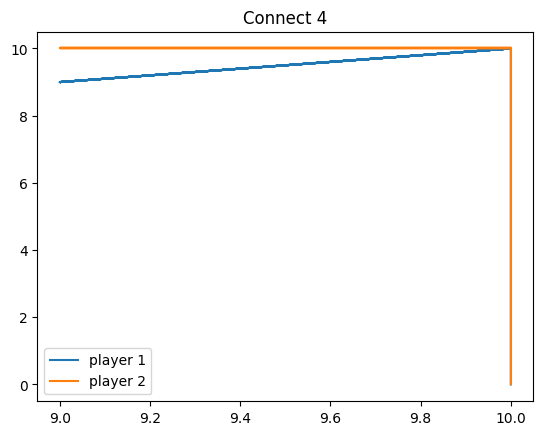

In [ ]:
obj = gameging_play()
obj.choices()
obj.Play()
print("-----------------------------------------------\n  the rec lists : \n")

ploting(obj.get_recursion_occurence_for_player1() , obj.get_recursion_occurence_for_player2())